## Base de dados do Monitoramento do Desmatamento da Floresta Amazônica Brasileira por Satélite - Projeto [PRODES](http://www.obt.inpe.br/prodes/)


Equipe: Dirceu André, Henrique, Jaqueline e Samuel.

Aqui estão os dados do [PRODES]('https://www.dpi.inpe.br/prodesdigital/prodesuc.php') por:
- Unidades de Conservação;
- Terras indígenas;
- Assentamentos do INCRA

Aqui estão os dados do [PRODES](''https://www.dpi.inpe.br/prodesdigital/prodesmunicipal.php) por:
- Bioma;
- Estado;
- Município:

### Observações do PRODES:
As estimativas de desflorestamento por município foram obtidas a partir do cruzamento do mapa de Municípios de 2007, escala 1:2.500.000 do IBGE, com dados de desmatamento do PRODES , relativos aos anos de 2000 a 2018.

Para cada ano de mapeamento PRODES foram gerados mosaicos no formato geotiff cuja resolução espacial original é de 30 x 30 metros. Após a geração dos mosaicos anuais, foi utilizado uma função do Sistema de TerraView que contou os "pixels" de cada classe  mapeada pelo PRODES (desmatamento, floresta, não floresta, hidrografia e nuvem) dentro de cada município, gerando uma tabela no banco de dados. Posteriormente esta quantidade de "pixels" por município foi convertida em área em Km2 (fórmula abaixo), gerando uma segunda tabela no banco.

AreaKm2 = ( NrPixel * (302)) / 1000000

A estimativa de extensão desmatada por município baseia-se no cálculo do desmatamento acumulado e observado até o ano selecionado dentro dos limites administrativos  dos municípios que fazem parte da Amazônia Legal. Além da classe com a extensão desflorestada, as áreas de outras classes de cobertura da terra  e nuvem, foram calculadas  para cada ano de análise como: floresta, nuvem, não floresta, hidrografia e área não observada. A classe “área não observada”  se refere às áreas cuja cenas Landsat TM foram descartadas pelo PRODES em um determinado ano, devido ao excesso de nuvens (aprox. 75% da cena coberta de nuvens sobre área de floresta) ou à baixa qualidade radiométrica ou ainda  devido à extrapolação dos limites da Amazônia Legal, como é o caso do Estado do Maranhão, que apresenta vários municípios cujos limites ultrapassam o Meridiano 44 oeste, que define a região.

Para analisar o desmatamento e sua dinâmica em um município, recomenda-se analisar não apenas os dados relativos ao desflorestamento, mas também os dados relativos às classes de cobertura da terra (floresta, não floresta, hidrografia), nuvens e áreas não observadas, para cada ano de interesse, pois a área de algumas dessas classes pode variar ao longo dos anos devido à presença de nuvens e de outros fatores inerentes à metodologia utilizada na geração dos dados.

Um fator importante é a variação no número de imagens que foram utilizadas em cada levantamento que é variável em função da disponibilidade de imagens sem cobertura de nuvens. Por exemplo há um grande aumento no número de imagens no ano de 2001 em relação ao de 2000. Deste modo a extensão de desmatamento em 2000 não é comparável aos anos posteriores sem levar em conta este aumento no número de imagens. Observa-se que a variação na área coberta por imagens não interfere no cálculo da taxa de desmatamento.

Como são produzidos com metedologias distintas, há diferenças entre os dados aqui apresentados e as "Estimativas Anuais das Taxas de Desflorestamento da Amazônia Legal" publicadas anualmente pelo INPE/OBT. Mais detalhes sobre o cálculo desta taxa em: www.obt.inpe.br/prodes/apresentacao_prodes.ppt

#### **Importa bibliotecas**

In [41]:
import pandas as pd
import plotly.express as px
import numpy as np

#### **Mount Drive**

In [42]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


#### **Importa base de dados do Portal de dados do [PRODES]('"https://www.dpi.inpe.br/prodesdigital/prodesmunicipal.php")**

In [43]:
# Lista de biomas em formato encodado
lista_biomas = ['Amaz%C3%B4nia', 'Caatinga', 'Cerrado', 'Mata%20Atl%C3%A2ntica', 'Pampa', 'Pantanal']

# Gera uma lista de links para exportação das bases, usando o link da função inspecionar
links = [f'https://www.dpi.inpe.br/prodesdigital/tabelatxt.php?ano=2022&estado=&bioma={bioma}&ordem=municipio&type=tabela&output=txt&' for bioma in lista_biomas]

# Cria uma lista vazia para armazenar os dados de cada bioma
agregacao = []

# Lista de nomes dos biomas correspondentes
biomas = ['Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica', 'Pampa', 'Pantanal']

# Loop para carregar os dados de cada bioma
for link, bioma in zip(links, biomas):
    # Utiliza a função read_csv para carregar os dados do link
    dados = pd.read_csv(link, sep=',')

    # Adiciona uma coluna 'bioma' ao DataFrame para identificar o bioma correspondente
    dados['bioma'] = bioma

    # Adiciona os dados do bioma atual à lista de agregação
    agregacao.append(dados)

# Concatena os DataFrames de cada bioma em um único DataFrame final
lista_desmatamento = pd.concat(agregacao, axis=0)

# Salva o DataFrame final em um arquivo Excel
lista_desmatamento.to_excel('/content/gdrive/MyDrive/(2023) Pesquisa Desmatamento e Bolsonaro/base_desmatamento.xlsx')

#### Informações do dataset

In [44]:
lista_desmatamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6536 entries, 0 to 21
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nr                6536 non-null   int64  
 1   Lat               6536 non-null   float64
 2   Long              6536 non-null   float64
 3   Municipio         6536 non-null   object 
 4   CodIbge           6536 non-null   int64  
 5   Estado            6536 non-null   object 
 6   AreaKm2           6536 non-null   int64  
 7   Desmatamento2000  6536 non-null   float64
 8   incremento2001    6536 non-null   float64
 9   incremento2002    6536 non-null   float64
 10  incremento2003    6536 non-null   float64
 11  incremento2004    6536 non-null   float64
 12  incremento2005    6536 non-null   float64
 13  incremento2006    6536 non-null   float64
 14  incremento2007    6536 non-null   float64
 15  incremento2008    6536 non-null   float64
 16  incremento2009    6536 non-null   float64
 1

In [45]:
lista_desmatamento.head(2)

,Nr,Lat,Long,Municipio,CodIbge,Estado,AreaKm2,Desmatamento2000,incremento2001,incremento2002,...,incremento2017,incremento2018,incremento2019,incremento2020,incremento2021,incremento2022,Floresta2022,NaoFloresta,Hidrografia,bioma
0,1,-12.472780,-62.137851,Alta Floresta D'Oeste,1100015,RO,7074,1761.1,73.1,114.7,...,19.3,13.8,30.0,25.4,24.9,24.2,2878.1,1745.1,19.7,Amazônia
1,2,-9.978231,-63.056372,Ariquemes,1100023,RO,4390,2661.2,78.9,125.4,...,20.7,16.8,18.5,22.4,14.9,11.8,944.0,91.2,0.2,Amazônia


In [46]:
# Análise exploratória
medias = pd.DataFrame(lista_desmatamento[['incremento2010',
        'incremento2010','incremento2011', 'incremento2012', 'incremento2013', 'incremento2014',
       'incremento2015', 'incremento2016', 'incremento2017', 'incremento2018',
       'incremento2019', 'incremento2020', 'incremento2021', 'incremento2022']].describe()).T.reset_index()

medias

,index,count,mean,std,min,25%,50%,75%,max
0,incremento2010,6536.0,3.580340,12.129123,0.0,0.1,0.4,2.3,349.6
1,incremento2010,6536.0,3.580340,12.129123,0.0,0.1,0.4,2.3,349.6
2,incremento2011,6536.0,3.445640,12.725406,0.0,0.0,0.2,1.8,318.9
3,incremento2012,6536.0,3.063693,10.817780,0.0,0.0,0.2,1.8,283.0
4,incremento2013,6536.0,3.909807,13.863269,0.0,0.0,0.3,2.1,305.1
5,incremento2014,6536.0,3.633614,12.193710,0.0,0.0,0.3,2.2,294.2
6,incremento2015,6536.0,3.398409,13.258157,0.0,0.0,0.2,1.5,308.2
7,incremento2016,6536.0,3.021711,13.793182,0.0,0.0,0.2,1.3,408.7
8,incremento2017,6536.0,2.893528,12.534733,0.0,0.0,0.2,1.3,346.8
9,incremento2018,6536.0,2.928228,13.162278,0.0,0.0,0.2,1.3,430.0


In [74]:
#cria um array estraíndo os anos
ticks_x = np.array(medias['index'].str.extract('(\d+)', expand=False))

fig = px.line(medias, x=ticks_x, y='mean', markers=True)
fig.update_layout(
    template = 'plotly_white+xgridoff+ygridoff',
            title="<i>Média anual do desmatamento na Amazônia Legal<b> (2010-2022)<b><i><br>",
            title_xanchor="auto",
            plot_bgcolor='rgb(255, 255, 255)',
            paper_bgcolor='rgb(255, 255, 255)',
                          xaxis_title='ano',
                          yaxis_title='Média de desmatamento<br>em milhões de Km²',
                          font=dict(family="arial",size=12),
                          #legend_title_text='<br><br>Temas<br>',
                          legend=dict(
                orientation="v",
                font_family="arial"))

#exibe os rótulos de anos
fig.update_xaxes(
    tickangle=0,
    rangeslider_visible=False,
    title_font_family="Arial")

fig.show()

## **Geração de Mapas**

### Importa bibliotecas

In [ ]:
import geopandas as gpd
import plotly.express as px
from zipfile import ZipFile
import io
import requests

### Importa dados da malha municipal 2020 (IBGE)




In [ ]:
# Baixar e descompactar o arquivo ZIP
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_Municipios_2020.zip"
response = requests.get(url)
with ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall("BR_Municipios_2020")

# Carregar o GeoDataFrame com as geometrias dos municípios
gdf_municipios = gpd.read_file("/content/BR_Municipios_2020/BR_Municipios_2020.shp")
gdf_municipios.CD_MUN = gdf_municipios.CD_MUN.astype(int)


### Exibe mapa da região (memory explode)

In [ ]:

# Filtrar os dados por estados
df_am = prodes[prodes['Estado'].isin(['AC','AM','MT','MS','PA','RO','RR','TO','MA'])].copy()
df_am.CodIbge = df_am.CodIbge.astype(int)

# Criar uma nova coluna no GeoDataFrame com base nas informações do DataFrame df_am
gdf_municipios = gdf_municipios.merge(df_am, how='left', left_on='CD_MUN', right_on='CodIbge')

# Criar o choropleth_mapbox
fig = px.choropleth_mapbox(gdf_municipios,
                           geojson=gdf_municipios.geometry,
                           locations=gdf_municipios.index,  # Use o índice como localizações
                           color='incremento2022',
                           mapbox_style="open-street-map",
                           center={"lat": -3.4653, "lon": -62.2159},
                           zoom=4,
                           opacity=0.5,
                           title='Desmatamento em 2000 por Município (AM)',
                           hover_name='NM_MUN')  # Use 'NM_MUN' como hover_name

# Exibir o mapa
fig.show()

### Exibe mapas com o incremento do desmatamento (municípios por estado)

In [ ]:
# estados da amazônia legal
df_am = lista_desmatamento[lista_desmatamento['Estado'].isin(['AC','AP','AM','MA','MT','PA','RO','RR','TO'])].copy()

# declara variável int
df_am.CodIbge = df_am.CodIbge.astype(int)

# Criar uma nova coluna no GeoDataFrame com base nas informações do DataFrame df_am
gdf_municipios = gdf_municipios.merge(df_am, how='left', left_on='CD_MUN', right_on='CodIbge')

# Iterar sobre cada estado e criar um mapa para cada um
for estado in df_am['Estado'].unique():
    estado_data = gdf_municipios[gdf_municipios['Estado'] == estado]

    # Criar o choropleth_mapbox
    fig = px.choropleth_mapbox(estado_data,
                               geojson=estado_data.geometry,
                               locations=estado_data.index,  # Use o índice como localizações
                               color='incremento2022',       # Variável indicada
                               mapbox_style="open-street-map",
                               center={"lat": -3.4653, "lon": -62.2159},
                               zoom=4,
                               opacity=0.5,
                               title=f'Desmatamento por Município em 2022 ({estado})',
                               hover_name='NM_MUN')  # Use 'NM_MUN' como hover_name


    # Exibir o mapa
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **Reorganiza a base de dados - função melt()**


In [ ]:
# aplica a função melt para transformar o banco de dados
melted_df = pd.melt(lista_desmatamento,
                    id_vars=['Nr', 'Lat', 'Long', 'Municipio','CodIbge', 'Estado', 'AreaKm2', 'bioma','Desmatamento2000','Floresta2022'],
                    var_name='Year',
                    value_name='Incremento')

# extrai o valor numérico de cada variável de Incremento
melted_df['Year'] = melted_df['Year'].str.extract('(\d+)', expand=False).str.lstrip()

# converte a variável para o formato timeseries
melted_df['Year'] = pd.to_datetime(melted_df['Year']).dt.strftime('%Y')

# filtrar dados considerando apenas estados incluídos na Amazônia Legal
df = melted_df[melted_df['Estado'].isin(['AC','AP','AM','MA','MT','PA','RO','RR','TO'])]

# filtra dados a partir do bioma
amazon = df[df['bioma'].isin(['Amazônia','Caatinga','Cerrado','Mata Atlântica','Pantanal'])]

# organiza os dados a partir do ano
am = amazon.sort_values('Year')

## seleciona apenas dados não nulo
## deletamos as linhas que falavam de hidrografia e nãofloresta
am = am[am['Year'].notna()]

# função para mapear os anos e criar a variável "Governo"
def mapear_governo(ano):
    if ano in ['2001', '2002']:
        return 'FHC II'
    elif ano in ['2003','2004','2005','2006']:
        return 'Lula I'
    elif ano in ['2007','2008','2009','2010']:
        return 'Lula II'
    elif ano in ['2011','2012','2013','2014']:
        return 'Dilma I'
    elif ano in ['2015']:
        return 'Dilma II'
    elif ano in ['2016','2017','2018']:
        return 'Temer'
    elif ano in ['2019','2020','2021','2022']:
        return 'Bolsonaro'
    else:
        return 'Governo Desconhecido'

# aplicando a função map() à coluna 'Year' do DataFrame 'am' para criar a variável governo
am['Governo'] = am['Year'].map(mapear_governo)


In [ ]:
am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20702 entries, 0 to 143791
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nr                20702 non-null  int64  
 1   Lat               20702 non-null  float64
 2   Long              20702 non-null  float64
 3   Municipio         20702 non-null  object 
 4   CodIbge           20702 non-null  int64  
 5   Estado            20702 non-null  object 
 6   AreaKm2           20702 non-null  int64  
 7   bioma             20702 non-null  object 
 8   Desmatamento2000  20702 non-null  float64
 9   Floresta2022      20702 non-null  float64
 10  Year              20702 non-null  object 
 11  Incremento        20702 non-null  float64
 12  Governo           20702 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [ ]:
am.head(10)

,Nr,Lat,Long,Municipio,CodIbge,Estado,AreaKm2,bioma,Desmatamento2000,Floresta2022,Year,Incremento,Governo
0,1,-12.472780,-62.137851,Alta Floresta D'Oeste,1100015,RO,7074,Amazônia,1761.1,2878.1,2001,73.1,FHC II
1828,61,-5.788372,-47.606018,Itaguatins,1710706,TO,747,Cerrado,332.0,258.1,2001,8.6,FHC II
1829,62,-8.299684,-48.044944,Itapiratins,1710904,TO,1238,Cerrado,141.4,585.1,2001,20.8,FHC II
1830,63,-12.856447,-48.677227,Jaú do Tocantins,1711506,TO,2167,Cerrado,434.7,1184.3,2001,45.0,FHC II
1831,64,-8.167068,-49.123506,Juarina,1711803,TO,257,Cerrado,78.8,100.7,2001,7.0,FHC II
1832,65,-11.049997,-50.218393,Lagoa da Confusão,1711902,TO,10564,Cerrado,642.7,8760.0,2001,56.8,FHC II
1833,66,-10.344695,-47.496865,Lagoa do Tocantins,1711951,TO,912,Cerrado,14.3,710.0,2001,1.2,FHC II
1834,67,-9.840206,-48.285779,Lajeado,1712009,TO,319,Cerrado,27.5,231.4,2001,0.5,FHC II
1835,68,-12.823046,-46.342307,Lavandeira,1712157,TO,517,Cerrado,68.5,350.3,2001,8.9,FHC II
1836,69,-9.495614,-46.829392,Lizarda,1712405,TO,5724,Cerrado,37.8,5385.3,2001,10.8,FHC II


In [ ]:
am.bioma.value_counts()

Amazônia    12298
Cerrado      8096
Pantanal      286
Caatinga       22
Name: bioma, dtype: int64

In [ ]:
am.Estado.value_counts()

MA    5544
MT    4510
TO    3630
PA    3322
AM    1364
RO    1166
AC     484
AP     352
RR     330
Name: Estado, dtype: int64

### Incremento no desmatamento por ano, governo e estados

In [ ]:
## Variação do desmatamento do Temer para o governo Bolsonaro

def calcula_variacao_percentual(valor_inicial, valor_final):
    try:
        variacao_percentual = ((valor_final - valor_inicial) / abs(valor_inicial)) * 100
        return round(variacao_percentual,2)
    except ZeroDivisionError:
        # Lidar com o caso em que o valor inicial é zero
        return float('inf')

calcula_variacao_percentual(34.64, 65.53)

89.17

In [ ]:
#Lula I para Lula II
def calcula_variacao_percentual(valor_inicial, valor_final):
    try:
        variacao_percentual = ((valor_final - valor_inicial) / abs(valor_inicial)) * 100
        return round(variacao_percentual,2)
    except ZeroDivisionError:
        # Lidar com o caso em que o valor inicial é zero
        return float('inf')

calcula_variacao_percentual(123.708,57.5811)

-53.45

In [ ]:
incremento_ano_gov = am.groupby(['Governo']).Incremento.sum().reset_index()
incremento_ano_gov = incremento_ano_gov.loc[[3,4,5,1,2,6,0]][::-1]
incremento_ano_gov

fig = px.bar(incremento_ano_gov, x='Incremento', y='Governo',color='Governo',
             text_auto='.2s')

fig.update_layout(width = 800, height = 500, template = 'plotly_white+xgridoff', margin=dict(r=80, l=80, b=2, t=160),
            title=("""
            <i>Desmatamento total da Amazônia Legal por <b>governo<b><i>"""),
            title_xanchor="auto",
            plot_bgcolor='rgb(255, 255, 255)',
            paper_bgcolor='rgb(255, 255, 255)',
                            yaxis_title='Governo',
                            xaxis_title='Desflorestamento em km² (total)',
                            font=dict(family="arial",size=13)
                           )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,showlegend=False)

fig.add_annotation(x=73000,y='Bolsonaro',text=f" Incremento de 89%",
            showarrow=True,
            arrowhead=1,
            ax = 80, ay = 0,
            font=dict(size=13, color="black", family="Arial"))

fig.add_annotation(x=64000,y='Lula II',text=f" Redução de 53%",
            showarrow=True,
            arrowhead=1,
            ax = 80, ay = 0,
            font=dict(size=13, color="black", family="Arial"))
fig.show()

In [32]:
incremento_ano_gov = am.groupby(['Governo','Year']).Incremento.sum().reset_index().sort_values('Year')
incremento_ano_gov

fig = px.bar(incremento_ano_gov, x='Incremento', y='Year',color='Governo',
             hover_data=['Year'],
             text_auto='.2s')
fig.update_layout(width = 800, height = 600, template = 'plotly_white+xgridoff+ygridoff', margin=dict(r=80, l=80, b=2, t=160),
            title=("""
            <i>Desmatamento na Amazônia Legal por <b>ano e governo<b><i>"""),
            title_xanchor="auto",
            plot_bgcolor='rgb(255, 255, 255)',
            paper_bgcolor='rgb(255, 255, 255)',
                            yaxis_title='Ano',
                            xaxis_title='Incremento em km²',
                            font=dict(family="arial",size=13),
                            legend_title_text='<br><br><br>Governo',
                            legend=dict(
                orientation="v",
                font_family="arial",))
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

NameError: ignored

In [ ]:
import plotly.express as px

incremento_ano_gov = am.groupby(['Governo','Year','Estado','bioma']).Incremento.sum().reset_index().sort_values('Year')

fig = px.bar(incremento_ano_gov,
             x='Governo',
             y='Incremento',
             color='bioma',
             barmode='stack'  # Configuração para barras empilhadas
            )

fig.update_layout(
    width=800,
    height=600,
    template='plotly_white+xgridoff+ygridoff',
    margin=dict(r=80, l=80, b=2, t=160),
    title=("""
        <i>Desmatamento na Amazônia Legal por <b>governo e bioma<b><i>"""),
    title_xanchor="auto",
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    yaxis_title='Km2',
    xaxis_title='Governo',
    font=dict(family="arial", size=13),
    legend_title_text='<br><br><br>',
    legend=dict(
        orientation="v",
        font_family="arial",
    )
)

fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="inside",
    cliponaxis=False
)

fig.show()


# **Critérios Avaliação Dataset**




- Data da Apresentação do  Trabalho: 22/11
- Tempo de apresentação por equipe: 10 minutos
- Subir os entregáveis no prazo é fundamental (21/11) - Subir com atraso = decréscimo da nota em 20%.
- Escolher um dataset (conjunto de dados) contendo dados qualitativos e quantitativos.




####  Entregáveis: Word ou PDF com análise detalhada (formato de artigo)
#### Trabalhar com professores de Produção de Textos I e Metodologia) e Power Point (apresentação de 10 minutos)
- Para as visualizações, escolher as ferramenta que melhor atender as suas necessidades. Ex: Excel, Power BI, Orange, Weka , Tableau, Redminer, Python, etc.


#### Descrever o dataset , contando o objetivo de sua criação e o que propõe
#### Descrever os atributos e informar o seu tipo.

- Explorar o dataset calculando a média, moda, mediana, mínimo e máximo, contagem dos atributos.
- Gerar histograma de alguns atributos, quando aplicável.
- Gerar o boxplot de alguns atributos , quando aplicável.
- Gerar o diagrama de dispersão de alguns atributos , quando aplicável.
- Gerar outros gráficos que ajudem a descrever/visualizar o dataset .
- Justificar a escolha de cada visualização.
- Descrever brevemente a “história contada” pelas visualizações escolhidas.


#### Critérios de avaliação:

- (1 ponto) - Apresentação da equipe (postura e pontualidade).
- (1 ponto) - Apresentação individual (contribuição individual).
- (1 ponto) - (Objetivos) Descreveu o dataset, explicando o propósito de sua criação e quais medidas ele se propõe a avaliar?
- (1 ponto) - (Se é categófico, numérico...) Detalhou os atributos do dataset, incluindo seus tipos?
- (1 ponto) - Realizou uma análise exploratória do dataset, calculando medidas estatísticas como média, moda, mediana, valor mínimo e máximo, e contagem para os atributos.
- (1 ponto) - Criou histogramas para representar graficamente alguns atributos, quando aplicável?
- (1 ponto) - Gerou box plots para ilustrar a distribuição de dados de certos atributos, quando aplicável?
- (1 ponto) - Construiu diagramas de dispersão para investigar relações entre diferentes atributos, quando aplicável?
- (1 ponto) - Criou outros gráficos relevantes que auxiliem na descrição e visualização do dataset?
- (1 ponto) - Forneceu justificativas para a escolha de cada método de visualização, explicando como contribuem para a compreensão do dataset?


#### Dataset

In [31]:
am.head(2)

NameError: ignored

- Explicar, por que, escolhemos cada método de visualização, explicando como contribuem para a compreensão do dataset?

1) análise exploratória do dataset, calculando medidas estatísticas como média, moda, mediana, valor mínimo e máximo, e contagem para os atributos.

In [ ]:
am[['Nr', 'Lat', 'Long', 'Municipio', 'CodIbge', 'Estado', 'AreaKm2',
       'bioma','Desmatamento2000','Incremento', 'Governo']].describe()

# [fogo.png]('https://conteudo.imguol.com.br/c/noticias/9c/2019/11/29/web-faz-meme-com-leonardo-dicaprio-apos-bolsonaro-citar-ator-como-um-dos-culpados-pelas-queimadas-na-amazonia-1575051594701_v2_900x506.png')

2) Criou histogramas para representar graficamente alguns atributos, quando aplicável?

In [ ]:
import plotly.express as px

fig = px.bar(am, x='Incremento', y='Estado',hover_data="Year",)
fig.show()

In [ ]:
fig = px.histogram(am, x="Incremento", color='Governo')
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(am, x="Incremento",animation_frame="Year",color='Governo')
fig.show()

In [30]:
import plotly.express as px

fig = px.histogram(am[am['Year']==2010], x='Incremento')
fig.update_layout(
    width=800,
    height=600,
    template='plotly_white',
    margin=dict(r=80, l=80, b=2, t=160),
    title=("""
        <i>Histograma - Desmatamento da Amazônia Legal <b>(2001-2022)<b><i>"""),
    title_xanchor="auto",
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    yaxis_title='Frequência',
    xaxis_title='Área em KM2',
    font=dict(family="arial", size=13),
    legend_title_text='<br><br><br>',
    legend=dict(
        orientation="v",
        font_family="arial",
    )
)
fig.show()

NameError: ignored

In [ ]:
fig = px.histogram(lista_desmatamento, x=['incremento2019', 'incremento2020', 'incremento2021', 'incremento2022'])
fig.update_layout(
    width=800,
    height=600,
    template='plotly_white',
    margin=dict(r=80, l=80, b=2, t=160),
    title=("""
        <i>Histograma - Desmatamento da Amazônia Legal <b>(Bolsonaro)<b><i>"""),
    title_xanchor="auto",
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    yaxis_title='Frequência',
    xaxis_title='Área em KM2',
    font=dict(family="arial", size=13),
    legend_title_text='<br><br><br>',
    legend=dict(
        orientation="v",
        font_family="arial",
    )
)
fig.show()

3) Gerou box plots para ilustrar a distribuição de dados de certos atributos, quando aplicável?

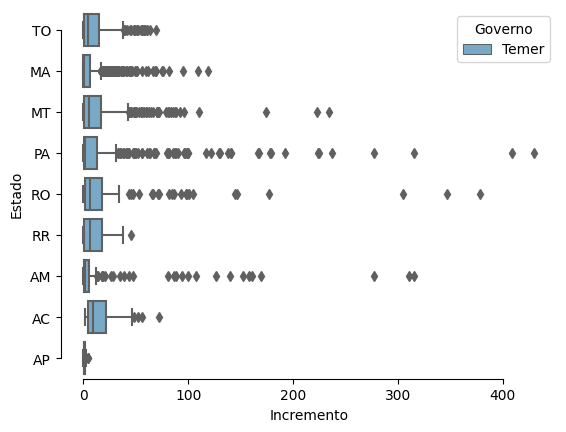

In [ ]:
import seaborn as sns
am2 = am[(am['Governo']=='Temer')]

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='Incremento', y="Estado",
            hue="Governo", palette="Blues",
            data=am2)
sns.despine(offset=None, trim=True)



In [ ]:
fig = px.box(am2, x="Incremento", y='Estado')
fig.show()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go
import pandas as pd

# Supondo que você já tenha definido o DataFrame 'am' com as colunas 'Governo', 'Estado' e 'Incremento'

# Obtendo a lista de governos únicos
governos_unicos = am['Governo'].unique()

# Calculando o número necessário de linhas para os subplots
num_linhas = len(governos_unicos)

# Criando subplots com uma coluna
fig = sp.make_subplots(rows=num_linhas, cols=1, subplot_titles=governos_unicos)

# Iterando sobre os governos e adicionando gráficos de caixa aos subplots
for i, governo in enumerate(governos_unicos):
    df_governo = am[am['Governo'] == governo]

    # Criando o gráfico de caixa
    trace = go.Box(x=df_governo['Estado'], y=df_governo['Incremento'], name=governo, boxpoints="all")

    # Adicionando o gráfico ao subplot
    fig.add_trace(trace, row=i + 1, col=1)

# Atualizando layout e exibindo o gráfico
fig.update_layout(title_text="Gráficos de Caixa Agrupados Um Abaixo do Outro")
fig.show()





In [ ]:
import plotly.express as px
import pandas as pd

# Supondo que você já tenha definido o DataFrame 'am' com as colunas 'Governo', 'Estado' e 'Incremento'

# Criando um gráfico de caixa para cada governo
for governo in am['Governo'].unique():
    df_governo = am[am['Governo'] == governo]

    # Criando o gráfico de caixa
    fig = px.box(df_governo, x="Estado", y="Incremento", color='Estado', points="all")

    # Adicionando título ao gráfico
    fig.update_layout(title_text=f'Box Plot para Incremento - Governo: {governo}')

    fig.update_layout(
    width=800,
    height=600,
    template='plotly_white+xgridoff+ygridoff',
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    yaxis_title='Área em KM2 desmatada',
    xaxis_title='Estados',
    font=dict(family="arial", size=13),
    legend_title_text='<br><br><br>',
    legend=dict(
        orientation="v",
        font_family="arial",
    )
)

    # Exibindo o gráfico
    fig.show()



4) Construiu diagramas de dispersão para investigar relações entre diferentes atributos, quando aplicável?

In [ ]:
import plotly.express as px
fig = px.scatter(am2, x='Incremento',color='Governo')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(am2, x="Incremento", y="Estado", color='Governo',
                 title="Conditionally Updating Traces In A Plotly Express Figure With for_each_trace()")



fig.show()

In [ ]:
 # Criando o gráfico de caixa
fig = px.box(am, x="Estado", y="Incremento", color='Governo', points='all')


# Exibindo o gráfico
fig.show()

In [ ]:
fig = px.scatter(am, x="Estado", y="Incremento", facet_col="Governo")
fig.update_layout(
width=1300,
height=700,
template='plotly_white+xgridoff+ygridoff',
plot_bgcolor='rgb(255, 255, 255)',
paper_bgcolor='rgb(255, 255, 255)',
yaxis_title='Área em KM2 desmatada',
)

fig.update_xaxes(
    tickangle=-65,
    rangeslider_visible=False,
    title_font_family="Arial")
fig.show()

- 5) Criou outros gráficos relevantes que auxiliem na descrição e visualização do dataset?

In [ ]:

# Seu DataFrame
meudf = am.copy()

# Colunas de interesse
colunas_interesse = ['Incremento']

# Selecionar apenas as colunas de interesse
dados_interesse = meudf[colunas_interesse]

# Utilizar o método describe para obter as estatísticas descritivas
estatisticas_descritivas = dados_interesse.describe()

# Adicionar a moda como uma linha adicional
moda = meudf[colunas_interesse].mode().iloc[0]
estatisticas_descritivas = estatisticas_descritivas.append(pd.Series(moda, name='moda'))

# Exibir as estatísticas descritivas
pd.DataFrame(estatisticas_descritivas)


<ipython-input-58-020458b1b7ba>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Incremento
count,20702.000000
mean,20.803787
std,57.861584
min,0.000000
25%,0.600000
50%,4.700000
75%,18.700000
max,1808.600000
moda,0.000000


In [ ]:
am['Incremento'].mode()

0    0.0
Name: Incremento, dtype: float64

In [ ]:
"http://www.obt.inpe.br/prodes/"

'http://www.obt.inpe.br/prodes/'

In [ ]:
"https://www.dpi.inpe.br/prodesdigital/prodesmunicipal.php"

## Dados Orçamento

### Prevenção

In [ ]:
prev_data = pd.read_csv('/content/gdrive/MyDrive/(2023) Pesquisa Desmatamento e Bolsonaro/21BS - Prevenção, Fiscalização, Combate e Controle ao Desmatamento Ilegal, aos Incêndios Florestais e aos Demais Ilícitos Ambientais na Amazônia Legal e sua Região Fronteiriça.csv', sep=';').replace('R$','')
prot_data = pd.read_csv('/content/gdrive/MyDrive/(2023) Pesquisa Desmatamento e Bolsonaro/21BT - Proteção, Fiscalização e Combate a Ilícitos na Amazônia Legal e sua Região Fronteiriça.csv', sep=';').replace('R$','')

In [ ]:
#prevenção
calcula_variacao_percentual(260776944,2066960)

-99.21

In [ ]:
prev_data[['Ano','Pagamento Efetivo']]

,Ano,Pagamento Efetivo
0,2020,"R$ 260.776.944,49"
1,2021,"R$ 15.474.086,02"
2,2022,"R$ 2.066.960,72"


In [ ]:
#proteção
calcula_variacao_percentual(152559724, 2377486)

-98.44

In [ ]:
prev_data[['Ano','Pagamento Efetivo']]

,Ano,Pagamento Efetivo
0,2020,"R$ 260.776.944,49"
1,2021,"R$ 15.474.086,02"
2,2022,"R$ 2.066.960,72"
